# Bid or Buy EDA

Step 1: import all csv files, concatenate and dedupe

In [1]:
import glob
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare
import seaborn as sns
from os import path
from wordcloud import WordCloud, STOPWORDS
import sys

pd.options.display.mpl_style = 'default'

/home/matthew/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
path =r'/home/matthew/Downloads' # use your path
allFiles = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)

frame = pd.concat(list_)


frame2 = frame.drop('Unnamed: 0', 1)

base = pd.DataFrame.drop_duplicates(frame2)

base['sellers'] = base['buyer']
base = base.drop('buyer', 1)

base['cat3']=base['cat3'].fillna('n/a')
base['cat2']=base['cat2'].fillna('n/a')


base['c123'] = base['cat1'] + 'll' + base['cat2']  + 'll' + base['cat3']

/home/matthew/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [3]:
sellers = pd.read_csv('sellers1.csv')
weekdays = pd.read_csv('weekdays.csv')

In [4]:
base = pd.merge(base, weekdays, on=['month', 'day'])
base = pd.merge(base, sellers, on='sellers', how = 'left')
base.head(25)

,title,price,date,cat1,cat2,cat3,month,day,time,sellers,c123,weekday,dropshipper
0,\n Stephen Joseph Rain Poncho Duck\n ...,220.0,Closed 17 Feb 03:49,Home & Living,"Flowers, Celebrations & Gifts",Gifts,Feb,17,03:49,Simplicity Online,"Home & LivingllFlowers, Celebrations & Giftsll...",Friday,NaN
1,\n Replacement Soft Strap With Electr...,695.0,Closed 17 Feb 03:49,Sport & Leisure,Exercise & Fitness,Other Exercise & Fitness,Feb,17,03:49,Simplicity Online,Sport & LeisurellExercise & FitnessllOther Exe...,Friday,NaN
2,\n Sunbeam Food Processor - Sunbeam\n...,455.0,Closed 17 Feb 03:49,Home & Living,Home Appliances,Small,Feb,17,03:49,Simplicity Online,Home & LivingllHome AppliancesllSmall,Friday,NaN
3,\n SA v ENGLAND - 2011 RUGBY WORLD CU...,2.0,Closed 17 Feb 03:46,Toys & Hobbies,Board Games & Cards,Trading Cards,Feb,17,03:46,Sosi Collectables,Toys & HobbiesllBoard Games & CardsllTrading C...,Friday,NaN
4,\n SA v SAMOA - 2011 RUGBY WORLD CUP ...,2.0,Closed 17 Feb 03:46,Toys & Hobbies,Board Games & Cards,Trading Cards,Feb,17,03:46,Sosi Collectables,Toys & HobbiesllBoard Games & CardsllTrading C...,Friday,NaN
5,\n SOUTH AFRICA (SADF) NUTRIA SCARF (...,50.0,Closed 17 Feb 03:46,Militaria,Clothing & Equipment,Uniforms,Feb,17,03:46,Camocorp,MilitariallClothing & EquipmentllUniforms,Friday,NaN
6,\n R S Clark: AUSTRALIA: Discovery an...,75.0,Closed 17 Feb 03:46,Books & Education,Non-Fiction,History & Politics,Feb,17,03:46,CaNum 13,Books & EducationllNon-FictionllHistory & Poli...,Friday,NaN
7,\n CONVERSATIONS WITH ANTONI TAPIES b...,60.0,Closed 17 Feb 03:46,Books & Education,Non-Fiction,Biographies & Memoirs,Feb,17,03:46,CaNum 13,Books & EducationllNon-FictionllBiographies & ...,Friday,NaN
8,\n Official Borat Mankini\n,195.0,Closed 17 Feb 03:45,Home & Living,"Flowers, Celebrations & Gifts",Gifts,Feb,17,03:45,Simplicity Online,"Home & LivingllFlowers, Celebrations & Giftsll...",Friday,NaN
9,\n HESTON TROUSER TAUPE 36\n,230.0,Closed 17 Feb 03:45,"Clothing, Shoes & Accessories",Men,Clothing,Feb,17,03:45,Simplicity Online,"Clothing, Shoes & AccessoriesllMenllClothing",Friday,NaN


In [5]:
base.dropshipper.fillna(0, inplace = True)

In [6]:
base.shape

(250718, 13)

# Exploratory Data Analysis EDA

Let's look at price using a histogram - see there is a non Gaussian distribution

/home/matthew/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


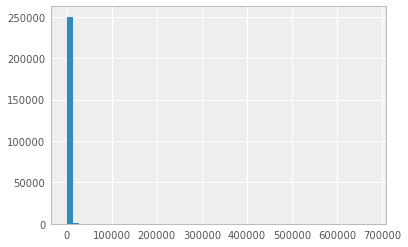

In [7]:
base['price'].hist(bins=50)

/home/matthew/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


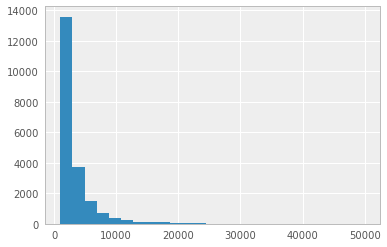

In [8]:
####change the amount and see what happens - the distribution stays the same
base_quantile = base[(base.price < 50000) & (base.price > 1000)]
base_quantile['price'].hist(bins = 25)

In [9]:
##### people purchase items worth over R100k? Let's see what the top ones are
base.sort('price', ascending = False, inplace = False).head(5)

/home/matthew/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,title,price,date,cat1,cat2,cat3,month,day,time,sellers,c123,weekday,dropshipper
195760,"\n BEST OF THE BEST, KING OF KINGS**2...",675000.0,Closed 9 Feb 10:02,Coins & Notes,Republic of South Africa Coins,Five Rand,Feb,9,10:02,Muntfin,Coins & NotesllRepublic of South Africa Coinsl...,Thursday,0.0
44595,\n Zebula Golf Estate - 9.62% Fractio...,462000.0,Closed 16 Jan 17:53,Property,Limpopo Province,Bela-bela (warmbaths),Jan,16,17:53,JacoJ,PropertyllLimpopo ProvincellBela-bela (warmbaths),Monday,0.0
73415,\n 1898 ZAR Gold 3 Pence NGC Graded M...,400000.0,Closed 26 Feb 21:01,Coins & Notes,ZAR Coins,Ponde,Feb,26,21:01,EWAAN Galleries,Coins & NotesllZAR CoinsllPonde,Sunday,0.0
31011,\n 2014 ford ranger wildtrack 4x4 dou...,389000.0,Closed 3 Jan 12:55,Cars,Ford,n/a,Jan,3,12:55,mariusf1,CarsllFordlln/a,Tuesday,0.0
51174,\n 2013 Toyota Fortuner 3.0D-4D RB\n ...,350000.0,Closed 1 Dec 18:11,Cars,Toyota,n/a,Dec,1,18:11,rosepdalton,CarsllToyotalln/a,Thursday,0.0


Let's look at price by day of the week. 

/home/matthew/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


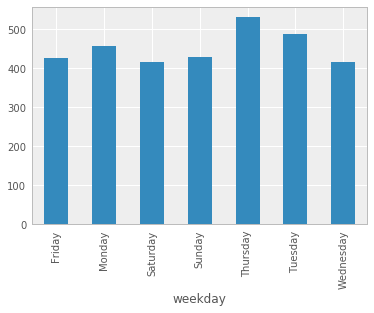

In [10]:
average_price = base.groupby(['weekday'])['price'].mean()
average_price.plot.bar()

/home/matthew/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


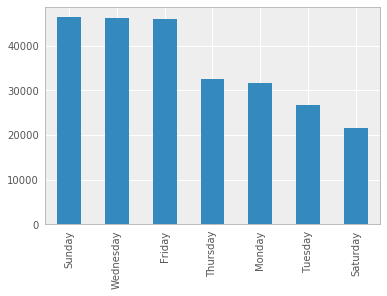

In [11]:
# Let's look at the volumes 
base.weekday.value_counts().plot(kind='bar')

/home/matthew/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


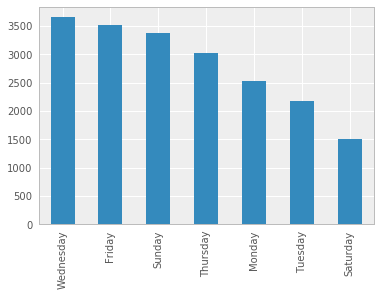

In [12]:
#think wednesday spike caused by R1 deals. R1 distribution is outlier, thus run this part to remove and see resulting distributions

base_f = base.loc[(base.price < 10000) & (base.price > 1000), ['weekday','price']]
base_f.weekday.value_counts().plot(kind='bar')

I thought the R1 sales were driving the spike, and that perhaps buyers on average bought cheaper items on Sun, Wed, and Friday. However, when I filter for higher priced items distribution stays the same.

If you look at the average price on these days, you will see how similar they are. THis reinforces the conclusion that these are the most popular days

Let's test this statistically

In [13]:
# I will use the chi squared test given the distribution. I am testing against the null hypothesis that volumes are the 
# same regardless of the day of the week
chi_base = base.weekday.value_counts()
chi_arr = np.array(chi_base)
chisquare(chi_arr)

Power_divergenceResult(statistic=17804.270886015365, pvalue=0.0)

In [14]:
chi_base_price = base.groupby(['weekday'])['price'].mean()
chi_arr_price = np.array(chi_base_price)
chisquare(chi_arr_price, f_exp = [448, 448, 448, 448, 448, 448, 448])

Power_divergenceResult(statistic=25.616168912316191, pvalue=0.00026243897195275801)

Based on the above p-values, it seems we can rejhect the hull hypothesis that the volume and average price are the same every day of the week

# Category Analysis

Let's look at categores with the highest rand value spend

First, I only want to use NY data, since December is typically driven by seasonality. 

In [38]:
#base_cat = base.loc[((base.month == 'Jan') | (base.month == 'Feb')) & (base.dropshipper == 2) & (base.price > 700)]
base_cat = base.loc[(base.cat2 == 'Cell Phones & Smartphones') & (base.price > 1000) & ((base.month == 'Jan') | (base.month == 'Feb'))]
#base_cat = base.loc[((base.sellers == 'Racer Gadgets') & ((base.month == 'Jan') | (base.month == 'Feb')))]
#base_cat = base.loc[((base.month == 'Dec') & (base.sellers == 'MacCell'))]
#base_cat = base.loc[(base.month == 'Feb')]

In [39]:
sellers_grouped = base_cat.groupby(['sellers'], as_index=False)['price'].sum()

cat_grouped = base_cat.groupby(['c123'], as_index=False)['price'].sum()
cat_grouped = cat_grouped.sort('price', ascending = False, inplace = False)

cat_grouped.head(25)

#a = cat_grouped.head(25)
#sns.barplot(x="price", y="c123", data=a)

/home/matthew/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,c123,price
0,Cell Phones & AccessoriesllCell Phones & Smart...,4525566.0


Cool, now I want to go through each category and see who the main sellers are and what their share is


In [40]:
q = input('how many categories would you like to see?\n')
q = int(q)
s = input('how many sellers per category?\n')
s = int(s)

a = cat_grouped.head(q)

b = a.c123
cats = np.array(b)

how many categories would you like to see?
1
how many sellers per category?
10


/home/matthew/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/matthew/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


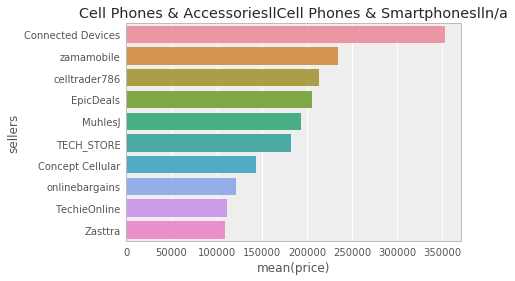

In [41]:
for i in cats:
    
    df = base_cat.loc[(base_cat.c123 == i)]    
    seller_grouped = df.groupby(['sellers', 'c123'], as_index=False)['price'].sum()
    seller_sorted = seller_grouped.sort('price', ascending = False, inplace = False)
    seller_capped = seller_sorted.head(s)
    
    plt.figure(i)
    sns.barplot(y="sellers", x="price", data=seller_capped)
    sns.plt.title(i)   

I am going to build a word cloud of all the titles in my targeted category

/home/matthew/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


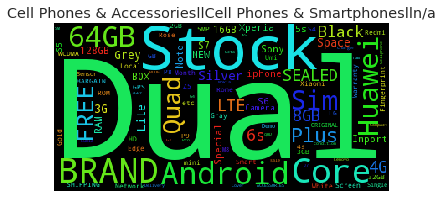

In [42]:
for i in cats:
    
    cloud1 = base_cat.loc[(base_cat.c123 == i)]
    cloud2 = cloud1.title
    
    words = ' '
    count = 0

    for line in cloud2:
        words += line

    remove_list = ['HO', '(HO)', 'HO:', 'ho', 'Ho', 'LOT', 'good', 'SAR', 'Sar', 'sar', 'NEW', 'GOOD' , 'open', 'OPEN',
                  'set', 'SET', 'Set', 'SEE', 'See', 'see', 'BOXED', 'Boxed', 'boxed', 'CONDITION', 'Condition', 
                  'condition', 'WATCH', 'Watch', 'watch', 'MEN', 'Men', 'men', 'Mens', 'MENS', 'WOMEN', 'Women', 
                  'women','WOMENs', 'Womens', 'womens', 'LADIES', 'Ladies', 'ladies', 'TOOL', 'Tool', 'tool',
                  'STUDIO', 'Studio', 'studio', 'LIGHTNING', 'Lightning', 'lightning', 'LIGHT', 'Light', 'light', 'black', 'Black'
                  ,'BLACK', 'phone','PHONE','Phone','New', 'NEW','new', 'inch', 'Inch', 'INCH', 'WHITE', 'White' ,'white',
                  'gold','GOLD','Gold', 'samsung', 'SAMSUNG','Samsung', 'Iphone', 'iPhone','IPHONE', 'APPLE', 'Apple', 'GALAXY',
                  'Galaxy', 'galaxy', 'SMARTPHONE','Smartphone','smartphone', 'cell', 'Cell','CELL','16gb','16GB','SIM','sim',
                  'Sim', 'local','Local','LOCAL', '32gb','32GB','BLACKBERRY','blackberry']

    word_list = words.split()
    filtered = ' '.join([i for i in word_list if i not in remove_list])
    
    wordcloud = WordCloud(
    background_color='black',
    max_words=100).generate(filtered)
    
    sns.plt.title(i)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.figure(i)

# Product Exploration

Let's look at specific products in specific categories

In [43]:
#a = base_cat[base_cat['title'].str.contains('projector')]
a = base_cat
#a = base.loc[(base.sellers == 'MacCell') & (base.month != 'Feb') & (base.price > 700)]
#a = base_cat.loc[(base_cat.cat3 == 'Electronic Components') & (base_cat.price > 600)]

/home/matthew/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


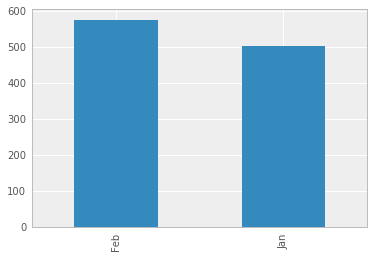

In [44]:
monthly = a[['month','price']]
monthly.month.value_counts().plot(kind='bar')

KeyboardInterrupt: 

/home/matthew/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


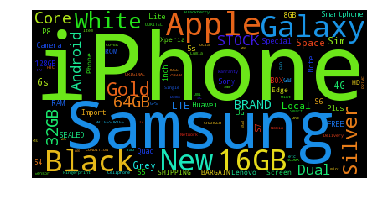

In [45]:
title = a.title

words = ' '
count = 0

for line in title:
        words += line

        remove_list = ['HO', '(HO)', 'HO:', 'ho', 'Ho', 'LOT', 'good', 'SAR', 'Sar', 'sar', 'NEW', 'GOOD' , 'open', 'OPEN',
                      'set', 'SET', 'Set', 'SEE', 'See', 'see', 'BOXED', 'Boxed', 'boxed', 'CONDITION', 'Condition', 
                      'condition', 'WATCH', 'Watch', 'watch', 'MEN', 'Men', 'men', 'Mens', 'MENS', 'WOMEN', 'Women', 
                      'women','WOMENs', 'Womens', 'womens', 'LADIES', 'Ladies', 'ladies', 'TOOL', 'Tool', 'tool',
                      'STUDIO', 'Studio', 'studio', 'LIGHTNING', 'Lightning', 'lightning', 'LIGHT', 'Light', 'light']

        word_list = words.split()
        filtered = ' '.join([i for i in word_list if i not in remove_list])
    
        wordcloud = WordCloud(
        background_color='black',
        max_words=100).generate(filtered)
    
        
        plt.imshow(wordcloud)
        plt.axis("off")
        

(0, 12000)

/home/matthew/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


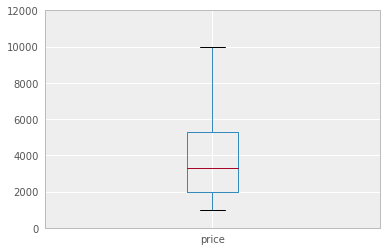

In [47]:

a.boxplot(column=['price'])
plt.ylim((0,12000))


In [29]:
import pandasql

q = """SELECT  *
                                    
      FROM a
              
      ;"""
    




output = pandasql.sqldf(q.lower(), locals())
output

,title,price,date,cat1,cat2,cat3,month,day,time,sellers,c123,weekday,dropshipper
0,\n GitUp Git 2 2K WiFi Action 1440P\n...,2367.0,Closed 19 Dec 14:33,Photo & Video,Video Cameras,Helmet & Action,Dec,19,14:33,MacCell,Photo & VideollVideo CamerasllHelmet & Action,Monday,2.0
1,\n HD 1080P Waterproof Car Motor Auto...,832.0,Closed 23 Feb 16:25,Photo & Video,Video Cameras,Helmet & Action,Feb,23,16:25,MacCell,Photo & VideollVideo CamerasllHelmet & Action,Thursday,2.0
2,\n HD 1920x1080P Car Waterproof Sport...,2248.0,Closed 23 Feb 16:25,Photo & Video,Video Cameras,Helmet & Action,Feb,23,16:25,MacCell,Photo & VideollVideo CamerasllHelmet & Action,Thursday,2.0
3,\n 1080P D008 FHD Wifi-enabled Car Sp...,1784.0,Closed 23 Feb 16:25,Photo & Video,Video Cameras,Helmet & Action,Feb,23,16:25,MacCell,Photo & VideollVideo CamerasllHelmet & Action,Thursday,2.0
4,\n HD Helmet Sport Car Video Waterpro...,713.0,Closed 23 Feb 16:25,Photo & Video,Video Cameras,Helmet & Action,Feb,23,16:25,MacCell,Photo & VideollVideo CamerasllHelmet & Action,Thursday,2.0
5,\n Full HD1080P Waterproof Wide Angle...,2069.0,Closed 23 Feb 16:25,Photo & Video,Video Cameras,Helmet & Action,Feb,23,16:25,MacCell,Photo & VideollVideo CamerasllHelmet & Action,Thursday,2.0
6,\n G200 Sport Action Cam Camera DV Wi...,1623.0,Closed 23 Feb 16:25,Photo & Video,Video Cameras,Helmet & Action,Feb,23,16:25,MacCell,Photo & VideollVideo CamerasllHelmet & Action,Thursday,2.0
7,\n G360 Video Camera DVR HD 1080P H.2...,1070.0,Closed 23 Feb 16:25,Photo & Video,Video Cameras,Helmet & Action,Feb,23,16:25,MacCell,Photo & VideollVideo CamerasllHelmet & Action,Thursday,2.0
8,\n AT83 Sports Action Camera Car DVR ...,1480.0,Closed 23 Feb 16:25,Photo & Video,Video Cameras,Helmet & Action,Feb,23,16:25,MacCell,Photo & VideollVideo CamerasllHelmet & Action,Thursday,2.0
9,\n AT80 Car DVR Camera HD Pinhole Spo...,1605.0,Closed 23 Feb 16:25,Photo & Video,Video Cameras,Helmet & Action,Feb,23,16:25,MacCell,Photo & VideollVideo CamerasllHelmet & Action,Thursday,2.0


# Top Selling Items

In [50]:
import pandasql


#step 1 - identify products sold at least 20x per month for dec, jan, feb
q = """SELECT  title,
                count(*) as volume
      FROM a
      GROUP BY
              title;"""

top_seller = pandasql.sqldf(q.lower(), locals())

top_seller = top_seller.sort('volume', ascending = False, inplace = False)
top_seller.head(20)
top_seller = top_seller.loc[(top_seller.volume > 4)]
#top_seller = top_seller.loc[(top_seller.volume < 63) & (top_seller.volume > 60)]


/home/matthew/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:13: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [437]:
Helmet & Action
#step 2 - create the table
q = """SELECT   month,
                count(*) as volume
      FROM base
      
      WHERE cat3 = 'Helmet & Action'
      
      GROUP BY
              month;"""
    
outcome = pandasql.sqldf(q.lower(), locals())

/home/matthew/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3367: UserWarning: The `x_order` parameter has been renamed `order`
  UserWarning)
/home/matthew/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


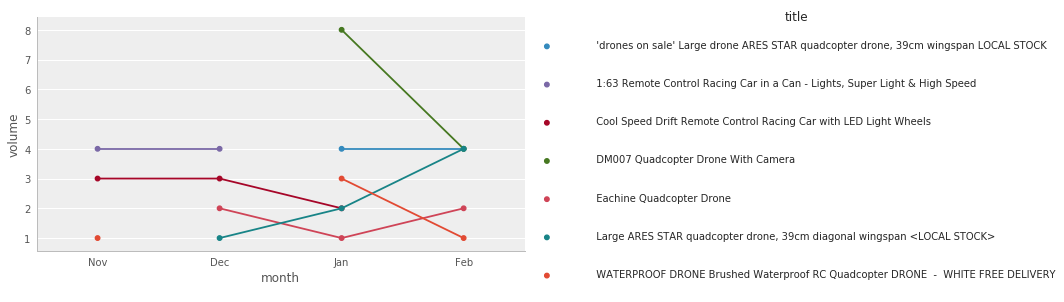

In [438]:
sns.factorplot(x="month", y="volume", hue="title", x_order=['Nov','Dec','Jan', 'Feb'], data=outcome, size=4, aspect=2)

# Smartphone Investigation

In [123]:
base_phone = base.loc[(base.cat2 == 'Cell Phones & Smartphones') & (base.price > 1000)]

#base_phone = base.loc[(base.cat2 == 'Cell Phones & Smartphones') & (base.price > 500) & (base.dropshipper == 0)]

#base_phone.head()


In [124]:
#step 2 - create the table
q = """SELECT  case when title like '%samsung%' then 'samsung'
                    when title like '%sony%' then 'sony'
                    when title like '%xiaomi%' then 'xiaomi_BG'
                    when title like '%redmi%' then 'xiaomi_BG'
                    when title like '%lenovo%' then 'lenovo_BG'
                    when title like '%apple%' then 'apple'
                    when title like '%iphone%' then 'iphone'
                    when title like '%oneplus%' then 'oneplus_BG'
                    when title like '%asus%' then 'asus'
                    when title like '%huawei%' then 'huawei'
                    when title like '%blackberry%' then 'blackberry'
                    when title like '%nokia%' then 'nokia'
                    when title like '%htc%' then 'htc_BG'
                    when title like '%caterpillar%' then 'caterpillar'
                    when title like '%lg%' then 'LG'
                    when title like '%google%' then 'Google'
                    when title like '%galaxy%' then 'samsung'
                    when title like '%hisense%' then 'hisense'
                    when title like '%letv%' then 'LeTV_BG'
                    when title like '%meizu%' then 'Meizu_BG'  
                    when title like '%doogee%' then 'DOOGEE_BG'
                    when title like '%umi rome%' then 'UMI' 
                    
                    
                    else 'none' end as make,
                month,
                count(*) as volume
      FROM base_phone
      
      GROUP BY
              case when title like '%samsung%' then 'samsung'
                    when title like '%sony%' then 'sony'
                    when title like '%xiaomi%' then 'xiaomi_BG'
                    when title like '%redmi%' then 'xiaomi_BG'
                    when title like '%lenovo%' then 'lenovo_BG'
                    when title like '%apple%' then 'apple'
                    when title like '%iphone%' then 'iphone'
                    when title like '%oneplus%' then 'oneplus_BG'
                    when title like '%asus%' then 'asus'
                    when title like '%huawei%' then 'huawei'
                    when title like '%blackberry%' then 'blackberry'
                    when title like '%nokia%' then 'nokia'
                    when title like '%htc%' then 'htc_BG'
                    when title like '%caterpillar%' then 'caterpillar'
                    when title like '%lg%' then 'LG'
                    when title like '%google%' then 'Google'
                    when title like '%galaxy%' then 'samsung'
                    when title like '%hisense%' then 'hisense'
                    when title like '%letv%' then 'LeTV_BG'
                    when title like '%meizu%' then 'Meizu_BG'  
                    when title like '%doogee%' then 'DOOGEE_BG'  
                    when title like '%umi rome%' then 'UMI' 
                    
                    else 'none' end,
                month;"""
    
outcome = pandasql.sqldf(q.lower(), locals())

/home/matthew/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3367: UserWarning: The `x_order` parameter has been renamed `order`
  UserWarning)
/home/matthew/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


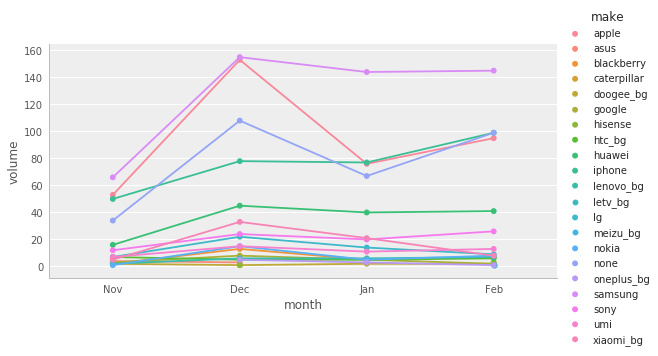

In [125]:

sns.factorplot(x="month", y="volume", hue="make", x_order=['Nov','Dec','Jan', 'Feb'], data=outcome, size=4, aspect=2)

In [126]:

q2 = """SELECT  case when title like '%samsung%' then 'samsung'
                    when title like '%sony%' then 'sony'
                    when title like '%xiaomi%' then 'xiaomi_BG'
                    when title like '%redmi%' then 'xiaomi_BG'
                    when title like '%lenovo%' then 'lenovo_BG'
                    when title like '%apple%' then 'apple'
                    when title like '%iphone%' then 'iphone'
                    when title like '%oneplus%' then 'oneplus_BG'
                    when title like '%asus%' then 'asus'
                    when title like '%huawei%' then 'huawei'
                    when title like '%blackberry%' then 'blackberry'
                    when title like '%nokia%' then 'nokia'
                    when title like '%htc%' then 'htc_BG'
                    when title like '%caterpillar%' then 'caterpillar'
                    when title like '%lg%' then 'LG'
                    when title like '%google%' then 'Google'
                    when title like '%galaxy%' then 'samsung'
                    when title like '%hisense%' then 'hisense'
                    when title like '%letv%' then 'LeTV_BG'
                    when title like '%meizu%' then 'Meizu_BG'  
                    when title like '%doogee%' then 'DOOGEE_BG'  
                    when title like '%umi rome%' then 'UMI' 
                    
                    else 'none' end as make,
                *
      FROM base_phone;"""
    
outcome2 = pandasql.sqldf(q2.lower(), locals())

In [127]:
q3 = """SELECT  count(*) as volume,
                make,
                month
                
      FROM outcome2
      where make in ("umi","xiaomi_BG","LeTV_BG","DOOGEE_BG","LeTV_BG")
      group by 
          make,
          month
      ;"""
    
outcome3 = pandasql.sqldf(q3.lower(), locals())

/home/matthew/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3367: UserWarning: The `x_order` parameter has been renamed `order`
  UserWarning)
/home/matthew/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


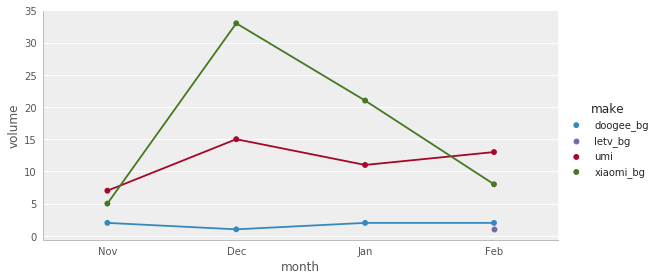

In [129]:
sns.factorplot(x="month", y="volume", hue="make", x_order=['Nov','Dec','Jan', 'Feb'], data=outcome3, size=4, aspect=2)
#outcome2.loc[(outcome2.make == 'none')]

/home/matthew/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3367: UserWarning: The `x_order` parameter has been renamed `order`
  UserWarning)
/home/matthew/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


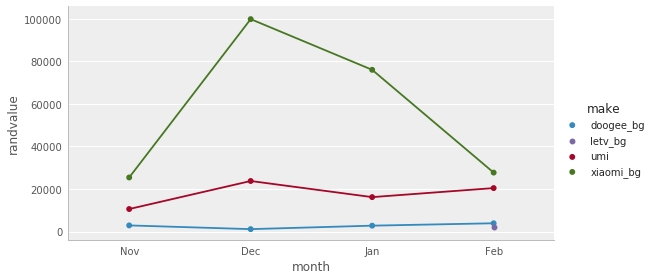

In [132]:
q4 = """SELECT  sum(price) as randvalue,
                make,
                month
                
      FROM outcome2
      where make in ("umi","xiaomi_BG","LeTV_BG","DOOGEE_BG","LeTV_BG")
      group by 
          make,
          month
      ;"""
    
outcome4 = pandasql.sqldf(q4.lower(), locals())
sns.factorplot(x="month", y="randvalue", hue="make", x_order=['Nov','Dec','Jan', 'Feb'], data=outcome4, size=4, aspect=2)


(0, 10000)

/home/matthew/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


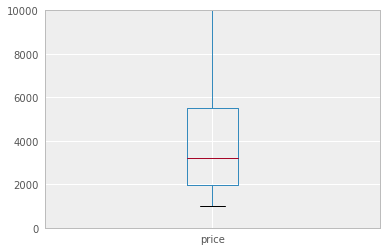

In [133]:

outcome2.boxplot(column=['price'])
plt.ylim((0,10000))

/home/matthew/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3367: UserWarning: The `x_order` parameter has been renamed `order`
  UserWarning)
/home/matthew/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


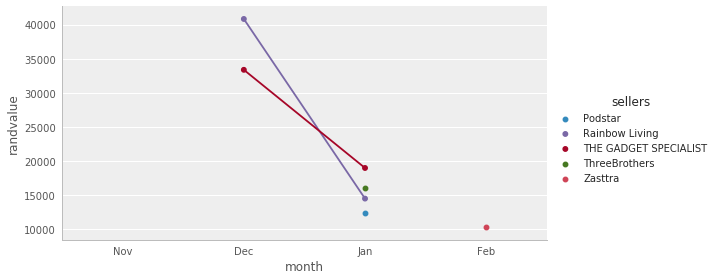

In [150]:
##sellers
q5 = """SELECT  sum(price) as randvalue,
                sellers,
                month
                
      FROM outcome2
      where make in ("umi","xiaomi_BG","LeTV_BG","DOOGEE_BG","LeTV_BG")
      group by 
          sellers,
          month
      ;"""
    
outcome5 = pandasql.sqldf(q5.lower(), locals())

q6 = """SELECT  *
                
      FROM outcome5
      WHERE randvalue > 10000
      ;"""
    
outcome6 = pandasql.sqldf(q6.lower(), locals())

sns.factorplot(x="month", y="randvalue", hue="sellers", x_order=['Nov','Dec','Jan', 'Feb'], data=outcome6, size=4, aspect=2)


In [148]:
outcome6

,randvalue,sellers,month
0,5360.0,BetterWay Lifestyle,Dec
1,6949.0,E-T-D,Dec
2,6999.0,Electromann SA,Nov
3,8697.0,JK Trading,Dec
4,7283.0,MacCell,Feb
5,12380.0,Podstar,Jan
6,40839.0,Rainbow Living,Dec
7,14496.0,Rainbow Living,Jan
8,33382.0,THE GADGET SPECIALIST,Dec
9,8463.0,THE GADGET SPECIALIST,Feb


In [587]:
sellers

,title,price,date,cat1,cat2,cat3,month,day,time,sellers,c123,weekday,dropshipper
194398,\n Huawei P9 Plus 64GB (Grey)\n,15268.0,Closed 9 Feb 21:20,Cell Phones & Accessories,Cell Phones & Smartphones,n/a,Feb,9,21:20,Zasttra,Cell Phones & AccessoriesllCell Phones & Smart...,Thursday,1.0
23517,\n Huawei MediaPad M2 10.0 Tablet PC ...,10381.0,Closed 19 Feb 20:59,Computers & Networking,"iPads, Tablets & eReaders",Devices,Feb,19,20:59,Zasttra,"Computers & NetworkinglliPads, Tablets & eRead...",Sunday,1.0
4951,"\n Huawei P8 max 32GB, Network: 4G, 6...",8265.0,Closed 16 Feb 12:00,Cell Phones & Accessories,Cell Phones & Smartphones,n/a,Feb,16,12:00,Zasttra,Cell Phones & AccessoriesllCell Phones & Smart...,Thursday,1.0
74715,"\n Huawei P8 max 32GB, Network: 4G, 6...",8261.0,Closed 26 Feb 17:43,Cell Phones & Accessories,Cell Phones & Smartphones,n/a,Feb,26,17:43,Zasttra,Cell Phones & AccessoriesllCell Phones & Smart...,Sunday,1.0
68869,\n Virgin Human Hair With Closure Per...,6243.0,Closed 28 Feb 00:21,Health & Beauty,Hair Extensions & Weaves,Human Hair,Feb,28,00:21,Zasttra,Health & BeautyllHair Extensions & WeavesllHum...,Tuesday,1.0
184016,\n Anet A6 DIY 3D Printer - A684\n ...,5599.0,Closed 13 Jan 23:08,Computers & Networking,"Printers, Scanners & Accessories",Printers,Jan,13,23:08,Zasttra,"Computers & NetworkingllPrinters, Scanners & A...",Friday,1.0
161111,"\n Autel MaxiDiag Elite MD802 OBDI, O...",5599.0,Closed 23 Feb 16:14,Car Parts & Accessories,Tools & Maintenance,Auto Tools & Kits,Feb,23,16:14,Zasttra,Car Parts & AccessoriesllTools & Maintenancell...,Thursday,1.0
161326,\n Anet A6 DIY 3D Printer - A684\n ...,5499.0,Closed 23 Feb 14:47,Computers & Networking,"Printers, Scanners & Accessories",Printers,Feb,23,14:47,Zasttra,"Computers & NetworkingllPrinters, Scanners & A...",Thursday,1.0
68949,\n Xtool X100 PRO Auto Key Programmer...,5485.0,Closed 28 Feb 00:17,Car Parts & Accessories,Tools & Maintenance,Auto Tools & Kits,Feb,28,00:17,Zasttra,Car Parts & AccessoriesllTools & Maintenancell...,Tuesday,1.0
194985,"\n Lenovo ZUK Z2 64GB, Network: 4G, F...",5142.0,Closed 9 Feb 16:38,Cell Phones & Accessories,Cell Phones & Smartphones,n/a,Feb,9,16:38,Zasttra,Cell Phones & AccessoriesllCell Phones & Smart...,Thursday,1.0
